In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from nltk.util import pr
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')  # Needed for word_tokenize
nltk.download('wordnet')  # Needed for WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dobar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dobar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dobar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **Import the Dataset**

In [3]:
data = pd.read_csv("labeled_data.csv")
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [4]:
dataset=data
# making copy of data

In [5]:
num_rows = data.shape[0]
print("Number of rows in the dataset:", num_rows)

Number of rows in the dataset: 24783


## **Map the column for HATE SPEECH**

In [6]:
data["labels"]=data["class"].map({0:"Hate Speech",1:"Offensive Speech",2:"Normal"})
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet            labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...            Normal  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  Offensive Speech  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  Offensive Speech  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  Offensive Speech  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  Offensive Speech  


In [7]:
data=data[["tweet","labels"]]
print(data.head())

                                               tweet            labels
0  !!! RT @mayasolovely: As a woman you shouldn't...            Normal
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  Offensive Speech
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  Offensive Speech
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  Offensive Speech
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  Offensive Speech


## **Data Cleaning**

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove white spaces
    text = text.strip()
    # Manual tokenization using split()
    tokens = text.split()
    # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Filter out stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Word lemmatization
    tokens = [lemmatizer.lemmatize(word, "v") for word in tokens]
    # Turn list back into string
    return ' '.join(tokens)

# Fill NaN values in the 'tweet' column
data.loc[:, "tweet"] = data["tweet"].fillna("")

# Apply the text cleaning function
data.loc[:, "tweet"] = data["tweet"].map(clean_text)

In [10]:
data

,tweet,labels
0,rt mayasolovely woman shouldnt complain clean ...,Normal
1,rt mleew boy dats coldtyga dwn bad cuffin dat ...,Offensive Speech
2,rt urkindofbrand dawg rt sbabylife ever fuck b...,Offensive Speech
3,rt cganderson vivabased look like tranny,Offensive Speech
4,rt shenikaroberts shit hear might true might f...,Offensive Speech
...,...,...
24778,yous muthafin lie lifeasking pearl coreyemanue...,Offensive Speech
24779,youve go break wrong heart baby drive redneck ...,Normal
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Speech
24781,youu get wild bitch tellin lie,Offensive Speech


## **prepare final data**

In [11]:
x=np.array(data["tweet"])
y=np.array(data["labels"])

In [12]:
x

array(['rt mayasolovely woman shouldnt complain clean house amp man always take trash',
       'rt mleew boy dats coldtyga dwn bad cuffin dat hoe st place',
       'rt urkindofbrand dawg rt sbabylife ever fuck bitch start cry confuse shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu get wild bitch tellin lie',
       'ruffle ntac eileen dahlia beautiful color combination pink orange yellow amp white coll httptcohdyebvnzb'],
      dtype=object)

In [13]:
y

array(['Normal', 'Offensive Speech', 'Offensive Speech', ...,
       'Offensive Speech', 'Offensive Speech', 'Normal'], dtype=object)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
# Initialize TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# Fit and transform the data
X = tfidf.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [16]:
X_train

<16604x6532 sparse matrix of type '<class 'numpy.float64'>'
	with 123264 stored elements in Compressed Sparse Row format>

In [17]:
X_test

<8179x6532 sparse matrix of type '<class 'numpy.float64'>'
	with 60727 stored elements in Compressed Sparse Row format>

### **algo accuracy**


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def algo_accuracy(y_test, prediction,model):

    cm = confusion_matrix(y_test, prediction)
    acs = accuracy_score(y_test, prediction)
    ps = precision_score(y_test, prediction, average='macro')  # Change 'macro' as needed
    rs = recall_score(y_test, prediction, average='macro')  # Change 'macro' as needed
    fs = f1_score(y_test, prediction, average='macro')  # Change 'macro' as needed
    
    print("Confusion Matrix:\n", cm)
    print("Accuracy Score:", acs)
    print("Precision Score:", ps)
    print("Recall Score:", rs)
    print("F1 Score:", fs)
    
    plt.figure(figsize=(8, 6))
    
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Greens')
    
    # Add a title to the plot
    plt.title('Confusion Matrix')
    
    # Show the plot
    plt.show()


## **Decision tree classifier**

In [28]:
from sklearn.tree import DecisionTreeClassifier 

In [29]:
# Initialize and train the Decision Tree Classifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Sample prediction
sample = "kill"
data = tfidf.transform([sample]).toarray()

# Predict and print the result
print(dt_clf.predict(data))

['Normal']


For DECISION TREE :
Confusion Matrix:
 [[  99   54  312]
 [  42 1135  202]
 [ 228  219 5888]]
Accuracy Score: 0.8707665973835432
Precision Score: 0.6647044090959888
Recall Score: 0.6551343451670674
F1 Score: 0.6588188225809101


<Figure size 800x600 with 0 Axes>

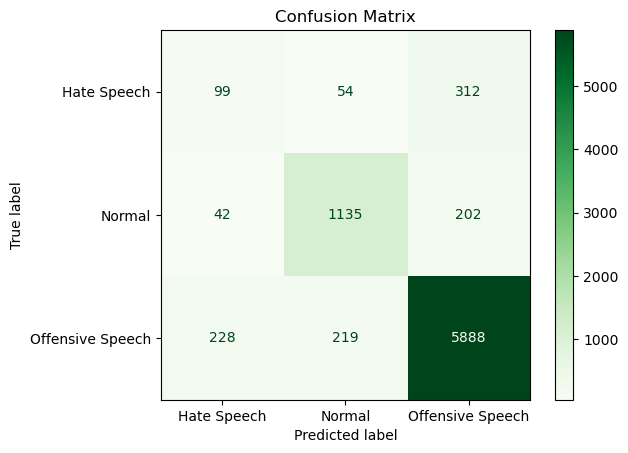

In [33]:
y_pred_dt = dt_clf.predict(X_test)
print("For DECISION TREE :")
algo_accuracy(y_test,y_pred_dt,dt_clf)


##### **decision tree using gridsearch finding best parameter**

In [48]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search over
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)


Improved Decision Tree Accuracy:
Confusion Matrix:
 [[  78   98  289]
 [   4 1323   52]
 [ 126  408 5801]]
Accuracy Score: 0.8805477442230102
Precision Score: 0.6809422386544982
Recall Score: 0.6809463971608309
F1 Score: 0.6621606166381456


<Figure size 800x600 with 0 Axes>

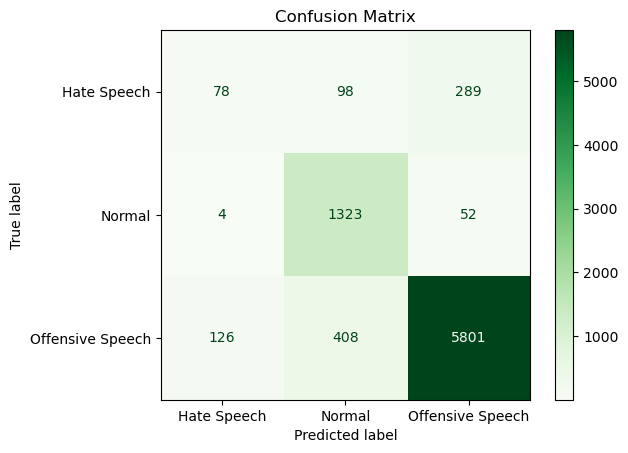

In [35]:
# Initialize a new DecisionTreeClassifier with the best parameters
dt_best=DecisionTreeClassifier(max_depth=20, min_samples_split=10)

dt_best.fit(X_train, y_train)

y_pred_dt_best =dt_best.predict(X_test)

print("Improved Decision Tree Accuracy:")
algo_accuracy(y_test,y_pred_dt_best,dt_best)


## **Random Forest**

Random Forest :
Confusion Matrix:
 [[  58   54  353]
 [   4 1213  162]
 [  48  193 6094]]
Accuracy Score: 0.900476830908424
Precision Score: 0.7600568673697471
Recall Score: 0.6554371591961822
F1 Score: 0.6659533110852703


<Figure size 800x600 with 0 Axes>

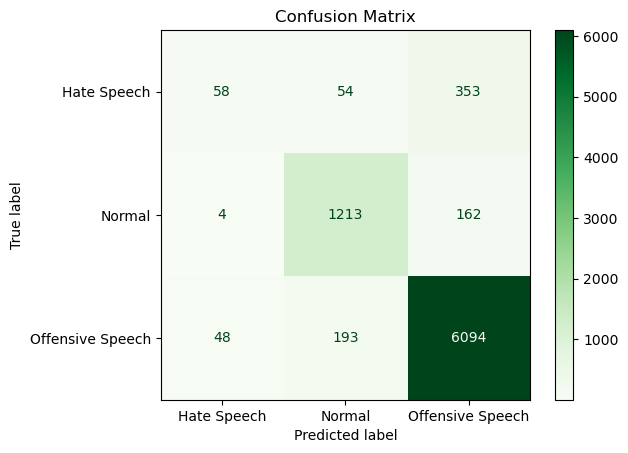

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest :")
algo_accuracy(y_test,y_pred_rf,rf_clf)


In [41]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Confusion Matrix:
 [[  59   51  355]
 [   5 1215  159]
 [  48  198 6089]]
Accuracy Score: 0.9002323022374373
Precision Score: 0.7596201141864998
Recall Score: 0.6563743585212473
F1 Score: 0.6668317642532778


<Figure size 800x600 with 0 Axes>

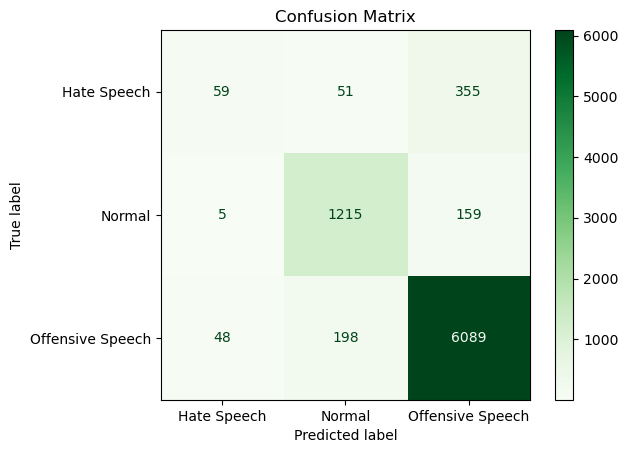

In [46]:
# Print best hyperparameters
best_rf_clf=RandomForestClassifier(min_samples_split=10)
best_rf_clf.fit(X_train,y_train)
y_pred_best_rf = best_rf_clf.predict(X_test)

# Calculate accuracy

algo_accuracy(y_test,y_pred_best_rf,best_rf_clf)


## **Naive Baise**

Naive Bayes Accuracy:
Confusion Matrix:
 [[   3   20  442]
 [   0  631  748]
 [   0   57 6278]]
Accuracy Score: 0.8450910869299425
Precision Score: 0.9106321308644442
Recall Score: 0.48501064524701926
F1 Score: 0.5090578563994325


<Figure size 800x600 with 0 Axes>

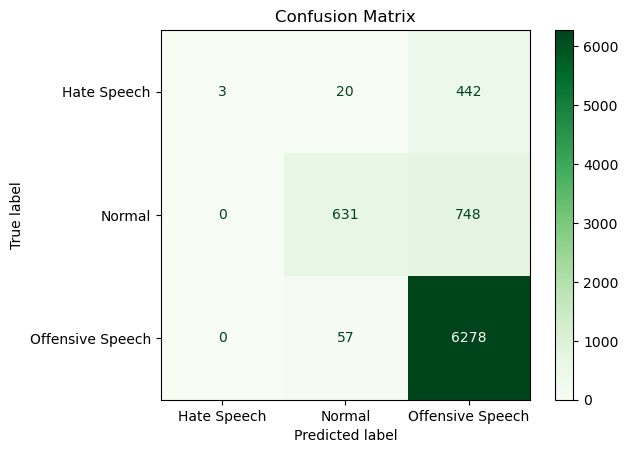

In [47]:
from sklearn.naive_bayes import MultinomialNB


nb_clf = MultinomialNB()

nb_clf.fit(X_train, y_train)

y_pred_nb = nb_clf.predict(X_test)

print("Naive Bayes Accuracy:")
algo_accuracy(y_test,y_pred_nb,nb_clf)

## **Linear SVM**

SVM Accuracy:
Confusion Matrix:
 [[  79   49  337]
 [   5 1225  149]
 [  58  192 6085]]
Accuracy Score: 0.9034111749602641
Precision Score: 0.7726612589991942
Recall Score: 0.6729180156943063
F1 Score: 0.6881429103425204


<Figure size 800x600 with 0 Axes>

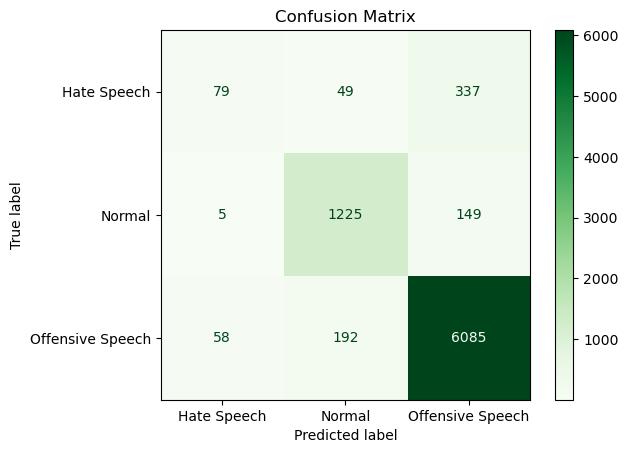

In [48]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')

svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)


print("SVM Accuracy:")
algo_accuracy(y_test,y_pred_svm,svm_clf)

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}


grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

Best SVM Accuracy:
Confusion Matrix:
 [[  79   49  337]
 [   5 1225  149]
 [  58  192 6085]]
Accuracy Score: 0.9034111749602641
Precision Score: 0.7726612589991942
Recall Score: 0.6729180156943063
F1 Score: 0.6881429103425204


<Figure size 800x600 with 0 Axes>

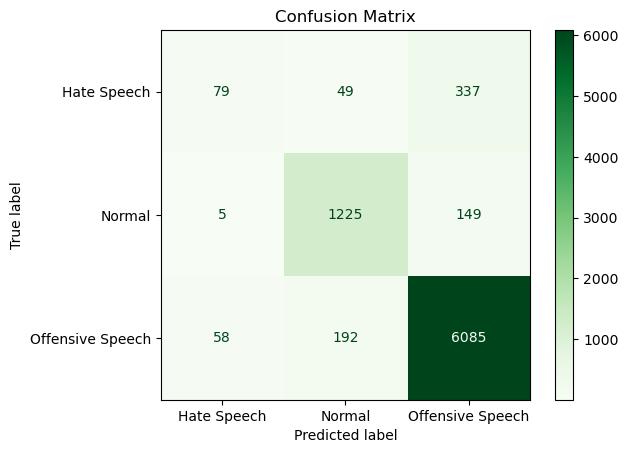

In [51]:
best_svm_clf = SVC(C=1, kernel='linear')
best_svm_clf.fit(X_train,y_train)

# Predict on test data using the best model
y_pred_svm_best = best_svm_clf.predict(X_test)

# Calculate accuracy
print("Best SVM Accuracy:")
algo_accuracy(y_test,y_pred_svm_best,best_svm_clf)

## **Logistic Regression L1**

Confusion Matrix:
 [[  82   63  320]
 [   0 1287   92]
 [  67  252 6016]]
Accuracy Score: 0.9029221176182908
Precision Score: 0.7632039236004046
Recall Score: 0.6864246351506239
F1 Score: 0.6910982255083397


<Figure size 800x600 with 0 Axes>

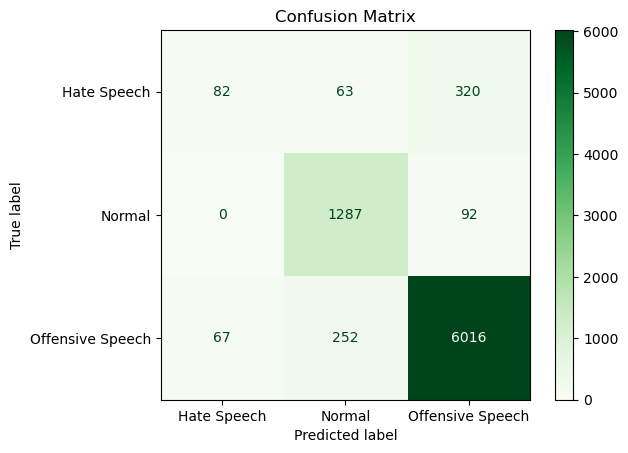

In [58]:
from sklearn.linear_model import LogisticRegression

lr_l1_clf = LogisticRegression(penalty='l1', solver='liblinear')  
# Use 'liblinear' for L1

lr_l1_clf.fit(X_train, y_train)

y_pred_lr_l1 = lr_l1_clf.predict(X_test)

algo_accuracy(y_test,y_pred_lr_l1,lr_l1_clf)

In [54]:
logreg = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\dobar\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dobar\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dobar\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dobar\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dobar\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dobar\minic

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

Confusion Matrix:
 [[  88   65  312]
 [   1 1299   79]
 [  71  256 6008]]
Accuracy Score: 0.9041447609732242
Precision Score: 0.7635828514872115
Recall Score: 0.6932054212088806
F1 Score: 0.6971680934777152


<Figure size 800x600 with 0 Axes>

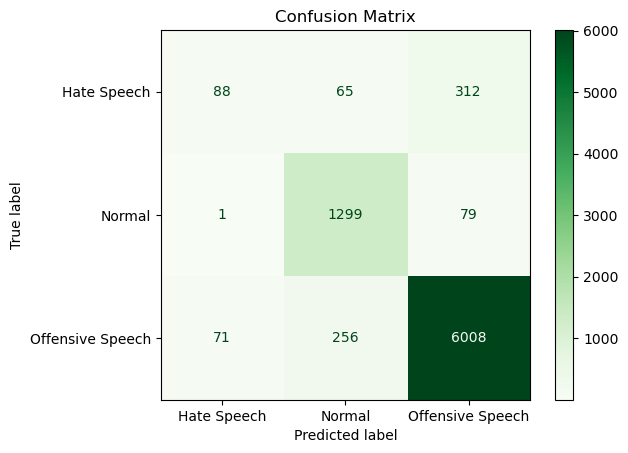

In [56]:

# Get the best model
best_logreg = LogisticRegression(C=1, penalty='l1', solver='saga')
best_logreg.fit(X_train,y_train)
# Predict on test data
y_pred_lr_best = best_logreg.predict(X_test)

# Calculate accuracy
algo_accuracy(y_test,y_pred_lr_best,best_logreg)

##  **K nearest naibour**

Confusion Matrix:
 [[  58  277  130]
 [  12 1117  250]
 [  65 3358 2912]]
Accuracy Score: 0.49969433916126665
Precision Score: 0.5164190678214574
Recall Score: 0.46480231423820295
F1 Score: 0.3875587625916935


<Figure size 800x600 with 0 Axes>

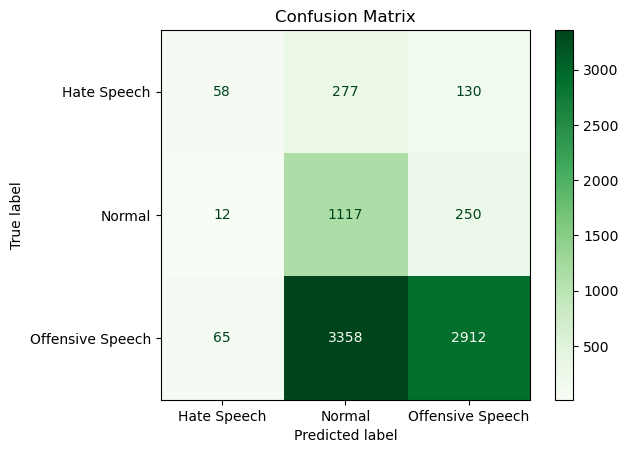

In [60]:

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)  

knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

algo_accuracy(y_test,y_pred_knn,knn_clf)

In [56]:
from sklearn.model_selection import GridSearchCV

# Create KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Perform Grid Search Cross Validation to find best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)





c:\Users\dobar\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\dobar\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dobar\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dobar\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "c:\Users\dobar\miniconda3\envs\hands_on_ml\

Best KNN Accuracy: 0.8031544198557281
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


Confusion Matrix:
 [[  80   12  373]
 [  29  418  932]
 [ 117  147 6071]]
Accuracy Score: 0.8031544198557281
Precision Score: 0.6338312933209718
Recall Score: 0.4778293228216195
F1 Score: 0.5148392256831802


<Figure size 800x600 with 0 Axes>

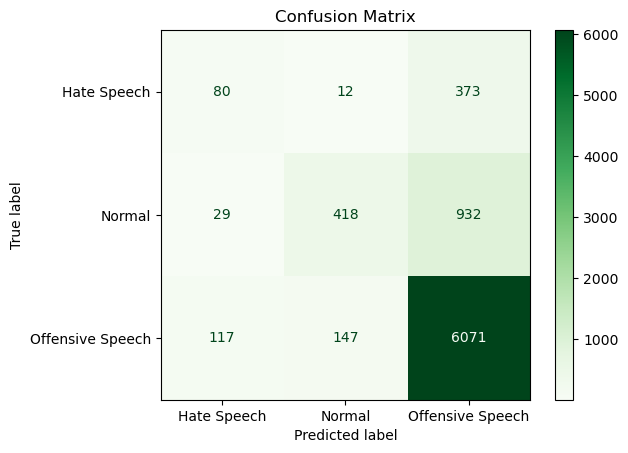

In [62]:
knn_clf_best = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')  

knn_clf_best.fit(X_train, y_train)

y_pred_knn_best = knn_clf_best.predict(X_test)
algo_accuracy(y_test,y_pred_knn_best,knn_clf_best)



In [63]:
# import matplotlib.pyplot as plt

# # Assuming you want to visualize the accuracy scores of different models
# models = ['DT', 'RF', 'NB', 'SVM', 'LR', 'KNN']
# accuracies = [accuracy_dt, accuracy_rf, accuracy_nb, accuracy_svm, accuracy_lr_l1, accuracy_knn]

# plt.bar(models, accuracies)
# plt.xlabel('Models')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Comparison of Different Models')
# plt.ylim([0, 1])  # Set y-axis limits for better visualization
# plt.show()

NameError: name 'accuracy_dt' is not defined